# **Air Traffic Control**
***
Air traffic control (ATC) is a service provided by ground-based air traffic controllers who direct aircraft on the ground and through a given section of controlled airspace, and can provide advisory services to aircraft in non-controlled airspace. The primary purpose of ATC worldwide is to prevent collisions, organize and expedite the flow of air traffic, and provide information and other support for pilots.

Air traffic controllers monitor the location of aircraft in their assigned airspace by radar and communicate with the pilots by radio.ATC provides services to all private, military, and commercial aircraft operating within its airspace. Depending on the type of flight and the class of airspace, ATC may issue instructions that pilots are required to obey, or advisories (known as flight information in some countries) that pilots may, at their discretion, disregard. The pilot in command is the final authority for the safe operation of the aircraft and may, in an emergency, deviate from ATC instructions to the extent required to maintain safe operation of their aircraft. 

####**Problem Statement**
To predict visiblity distance based on different climatic conditions as used by ATC for their purpose of landing or taking off the aeroplane

##Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Getting Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/data/ATC_Plane/jfk_weather_cleaned.csv')
df.head()

,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,01-01-2010 00:51,6.0,33,32,31,92,0,0,29.97,29.99,0.01
1,01-01-2010 01:51,6.0,33,33,32,96,0,0,29.97,29.99,0.02
2,01-01-2010 02:51,5.0,33,33,32,96,0,0,29.97,29.99,0.02
3,01-01-2010 03:51,5.0,33,33,32,96,0,0,29.95,29.97,0.02
4,01-01-2010 04:51,5.0,33,32,31,92,0,0,29.93,29.96,0.02


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75083 entries, 0 to 75082
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              75083 non-null  object 
 1   VISIBILITY        75083 non-null  float64
 2   DRYBULBTEMPF      75083 non-null  int64  
 3   WETBULBTEMPF      75083 non-null  int64  
 4   DewPointTempF     75083 non-null  int64  
 5   RelativeHumidity  75083 non-null  int64  
 6   WindSpeed         75083 non-null  int64  
 7   WindDirection     75083 non-null  int64  
 8   StationPressure   75083 non-null  float64
 9   SeaLevelPressure  75083 non-null  float64
 10  Precip            75083 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 6.3+ MB


In [4]:
## checking for missing value
df.isna().sum()

DATE                0
VISIBILITY          0
DRYBULBTEMPF        0
WETBULBTEMPF        0
DewPointTempF       0
RelativeHumidity    0
WindSpeed           0
WindDirection       0
StationPressure     0
SeaLevelPressure    0
Precip              0
dtype: int64

* No missing values are present

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VISIBILITY,75083.0,9.211896,2.202311,0.00,10.00,10.00,10.00,14.00
DRYBULBTEMPF,75083.0,55.355527,17.394334,1.00,42.00,56.00,70.00,102.00
WETBULBTEMPF,75083.0,49.327544,16.182867,-1.00,36.00,50.00,64.00,85.00
DewPointTempF,75083.0,42.424024,19.577957,-19.00,27.00,44.00,59.00,84.00
RelativeHumidity,75083.0,64.812075,19.898962,8.00,49.00,66.00,82.00,100.00
WindSpeed,75083.0,11.253240,6.101048,0.00,7.00,10.00,15.00,53.00
WindDirection,75083.0,196.550751,107.692804,0.00,110.00,200.00,290.00,360.00
StationPressure,75083.0,30.005579,0.235172,28.52,29.86,30.00,30.15,30.83
SeaLevelPressure,75083.0,30.026049,0.234069,28.54,29.88,30.02,30.17,30.85
Precip,75083.0,0.005478,0.036161,0.00,0.00,0.00,0.00,2.41


Observations
*  **`WETBULBTEMPF`** and **`DewPointTempF`** have negative values while others have only positive values
*  Visibility ranges from 0.00 to 14.00 with the mean of 9.3


##Data Preprocessing

In [8]:
for i in df.columns:
  if df[i].dtype !='O':
    print('Distribution of '+i)
    print(df[i].value_counts())
    print('-'*50)

Distribution of VISIBILITY
10.00    63371
9.00      1748
8.00      1582
7.00      1375
6.00      1210
5.00       934
3.00       694
2.00       595
4.00       536
0.25       521
0.50       512
1.00       435
2.50       381
1.50       340
0.12       336
0.00       245
0.75       202
1.75        34
1.25        31
14.00        1
Name: VISIBILITY, dtype: int64
--------------------------------------------------
Distribution of DRYBULBTEMPF
73     1690
72     1571
74     1560
75     1543
76     1523
       ... 
101       2
102       1
100       1
1         1
2         1
Name: DRYBULBTEMPF, Length: 102, dtype: int64
--------------------------------------------------
Distribution of WETBULBTEMPF
 66    1756
 68    1724
 67    1718
 69    1715
 65    1667
       ... 
 1        3
-1        1
 0        1
 85       1
 84       1
Name: WETBULBTEMPF, Length: 86, dtype: int64
--------------------------------------------------
Distribution of DewPointTempF
 67    1446
 60    1405
 58    1394
 65    139

Observations
* Visibility of approx of 85 percent of data is 10.00 with only 1 observation having 14.00
*  Seems like wind mostly flows in parallel
* 90 percent of data have 0.00 Precip
* Data is highly unbalanced

In [3]:
# extraction of date
df['DATE'] = pd.to_datetime(df['DATE'])

df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.dayofweek
df['hour'] = df['DATE'].dt.hour

In [17]:
l = ['year','month','day','hour']

for i in l:
  print('Distribution of '+i)
  print(df[i].value_counts())
  print('-'*50)

Distribution of year
2012    8784
2016    8780
2011    8762
2010    8756
2014    8755
2015    8754
2017    8754
2013    8753
2018    4985
Name: year, dtype: int64
--------------------------------------------------
Distribution of month
1     6574
5     6573
3     6565
7     6475
6     6358
4     6357
10    6119
8     6118
12    6117
2     5979
9     5924
11    5924
Name: month, dtype: int64
--------------------------------------------------
Distribution of day
5    10752
4    10746
2    10742
6    10725
1    10721
3    10701
0    10696
Name: day, dtype: int64
--------------------------------------------------
Distribution of hour
2     3131
22    3131
4     3131
14    3131
7     3131
23    3130
10    3130
19    3130
1     3130
11    3130
8     3130
20    3130
17    3130
6     3130
5     3130
16    3130
13    3129
0     3128
12    3128
3     3126
21    3124
18    3121
15    3121
9     3121
Name: hour, dtype: int64
--------------------------------------------------


Observations
* Data of year 2018 is almost half from the other years
*  Other data is almostly equally distributed among each of the category

In [4]:
# creating bins for visibility

df['visi_bins'] = pd.cut(df['VISIBILITY'], bins = [-1,4,8, 11, 15], labels = ['0-4','5-8', '9-10', '11-15'])

df['visi_bins'].value_counts()

9-10     65119
5-8       5101
0-4       4862
11-15        1
Name: visi_bins, dtype: int64

##Data Visualization

In [24]:
sns.set_style('whitegrid')
sns.pairplot(data = df)

Output hidden; open in https://colab.research.google.com to view.

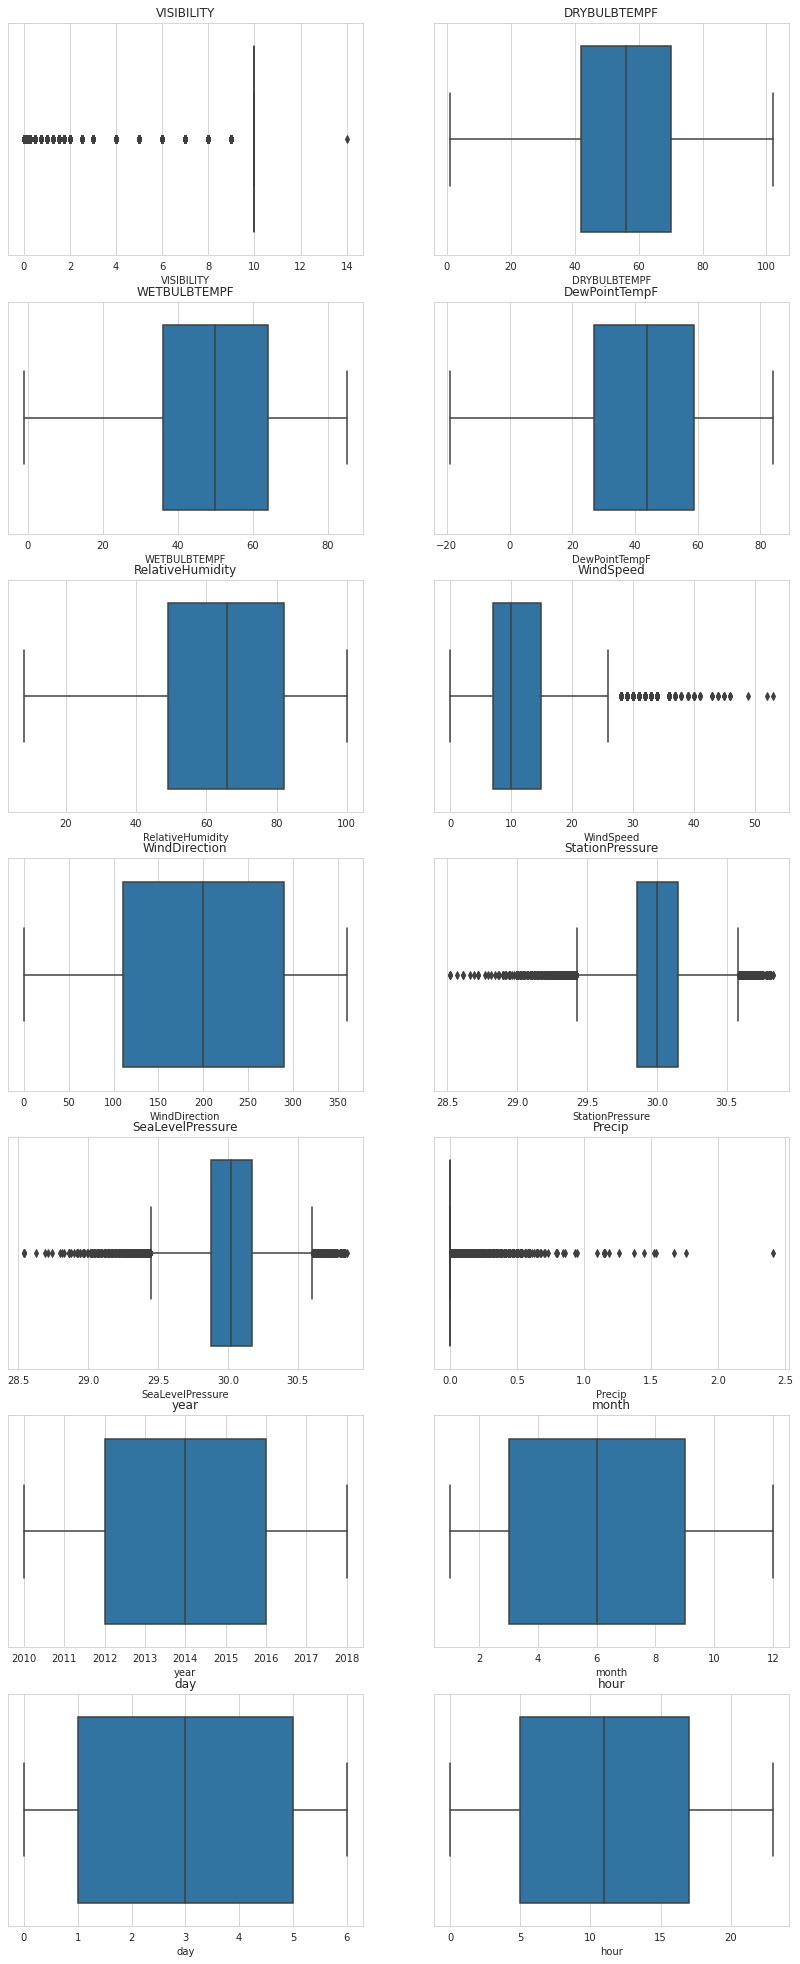

In [34]:
fig,([ax0,ax1],[ax2,ax3],[ax4,ax5],[ax6,ax7],[ax8,ax9],[ax10,ax11],[ax12,ax13]) = plt.subplots(ncols=2,nrows=7,figsize=(14,35))

ax = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13]

cols = ['VISIBILITY',
 'DRYBULBTEMPF',
 'WETBULBTEMPF',
 'DewPointTempF',
 'RelativeHumidity',
 'WindSpeed',
 'WindDirection',
 'StationPressure',
 'SeaLevelPressure',
 'Precip',
 'year',
 'month',
 'day',
 'hour']


for i in range(0,14):

  #sns.set(rc={'figure.figsize':(40,20)})
  sns.boxplot(x=df[cols[i]],ax=ax[i],)
  ax[i].set_title(cols[i])



Observations
* Not much have outliers
* Wind Speed, Station pressure, precip, sea level pressure have some outliers present in the data
* Visibility also have outliers but cannot remove them

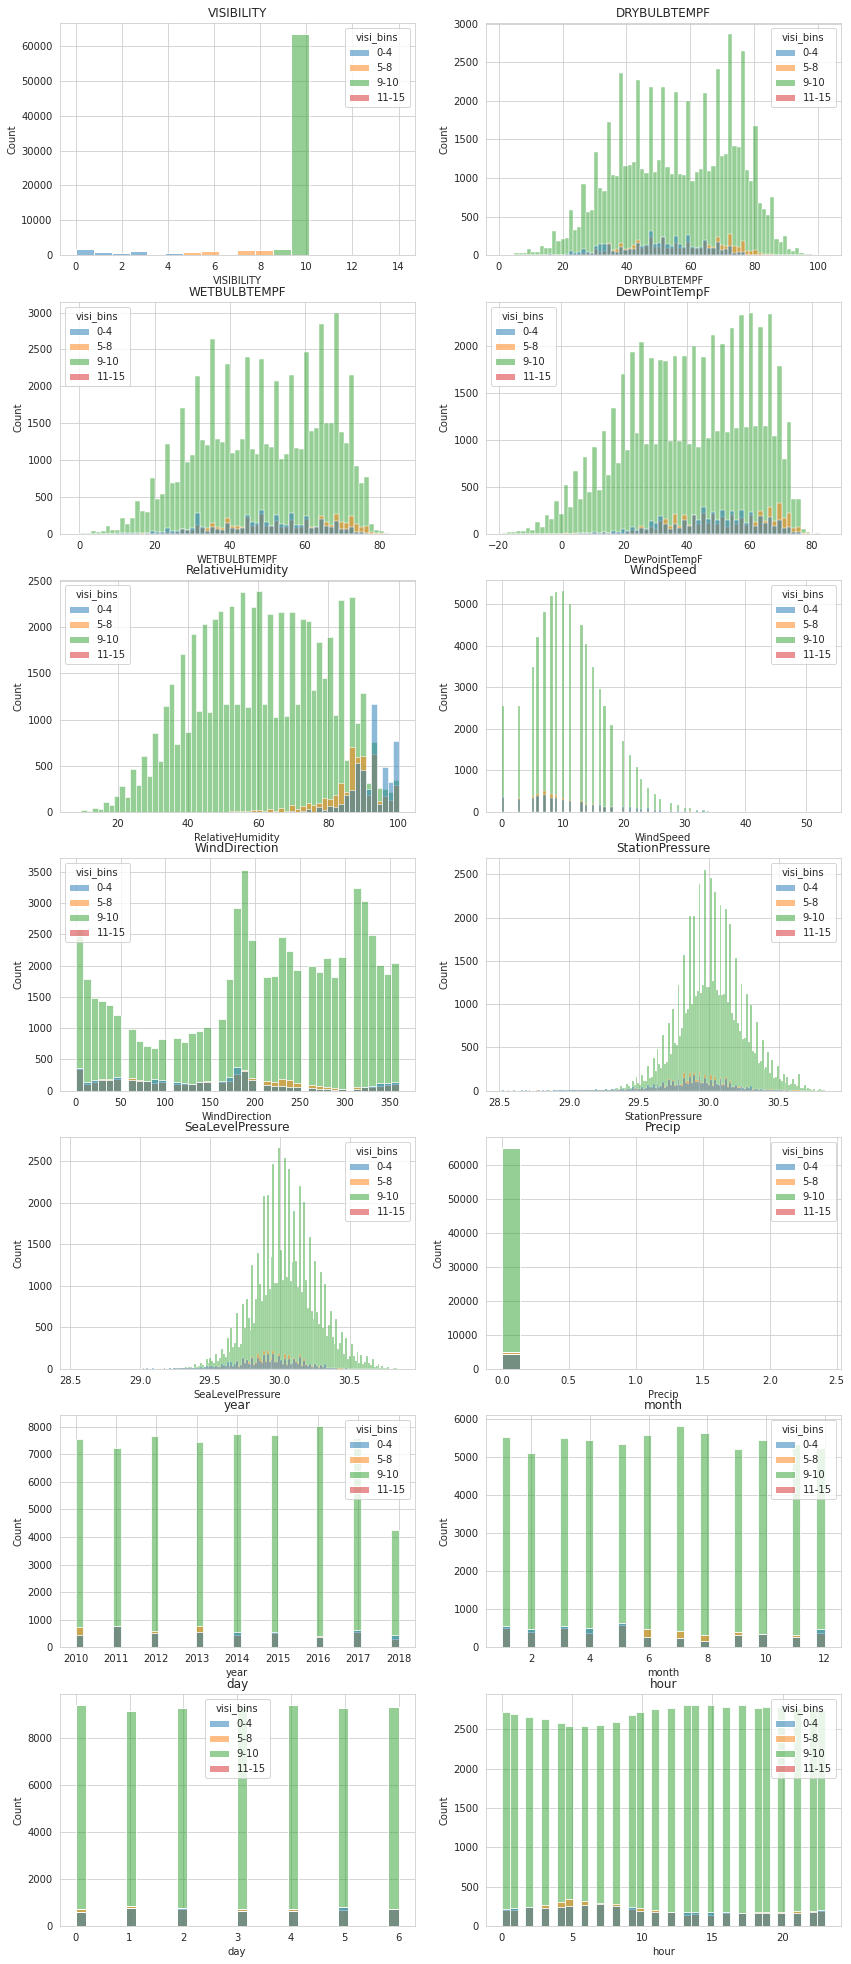

In [35]:
fig,([ax0,ax1],[ax2,ax3],[ax4,ax5],[ax6,ax7],[ax8,ax9],[ax10,ax11],[ax12,ax13]) = plt.subplots(ncols=2,nrows=7,figsize=(14,35))

ax = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13]

cols = ['VISIBILITY',
 'DRYBULBTEMPF',
 'WETBULBTEMPF',
 'DewPointTempF',
 'RelativeHumidity',
 'WindSpeed',
 'WindDirection',
 'StationPressure',
 'SeaLevelPressure',
 'Precip',
 'year',
 'month',
 'day',
 'hour']


for i in range(0,14):

  #sns.set(rc={'figure.figsize':(40,20)})
  sns.histplot(x=df[cols[i]],ax=ax[i],hue=df['visi_bins'])
  ax[i].set_title(cols[i])



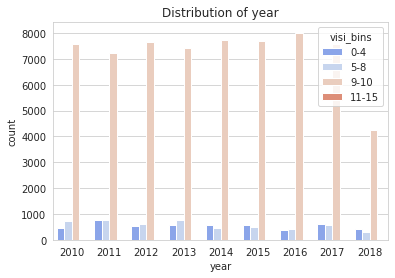

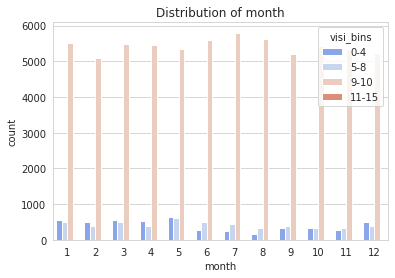

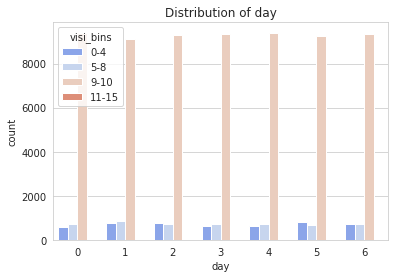

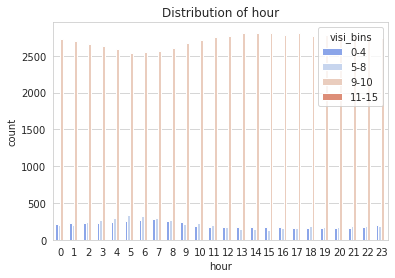

In [41]:
l = 'year month day hour'.split(' ')

for i in l:
  sns.countplot(x = df[i],hue=df['visi_bins'],palette='coolwarm')
  plt.xlabel(i)
  plt.title('Distribution of '+i)
  plt.show()

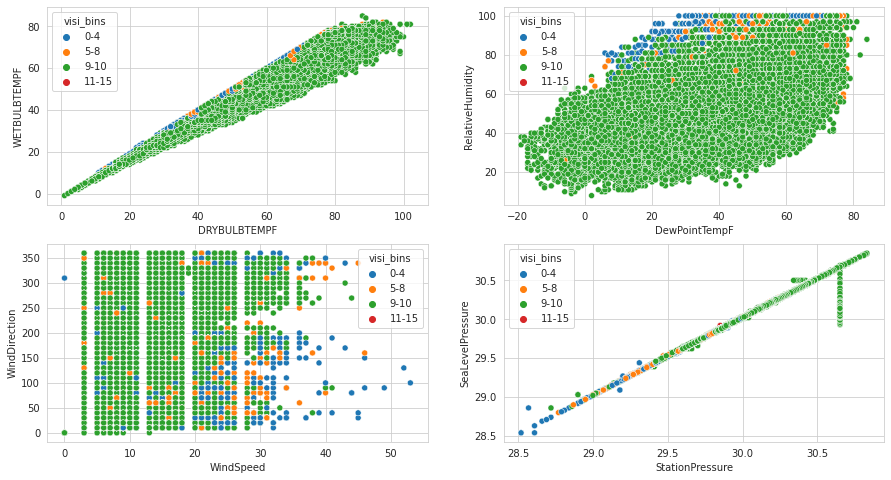

In [45]:
fig,([ax0,ax1],[ax2,ax3]) = plt.subplots(ncols=2,nrows=2,figsize=(15,8))

sns.scatterplot(x=df['DRYBULBTEMPF'],y=df['WETBULBTEMPF'],hue=df['visi_bins'],ax=ax0)
sns.scatterplot(x=df['DewPointTempF'],y=df['RelativeHumidity'],hue=df['visi_bins'],ax=ax1)
sns.scatterplot(x=df['WindSpeed'],y=df['WindDirection'],hue=df['visi_bins'],ax=ax2)
sns.scatterplot(x=df['StationPressure'],y=df['SeaLevelPressure'],hue=df['visi_bins'],ax=ax3)

Observations
* Sea level pressure and station pressure less than 29.5 results in less visibility
* windspeed greater than 30 than visibility falls in the range of 0-4
* When wetbulb temperature and dry bulb temperature are almost same than there is less visibility 

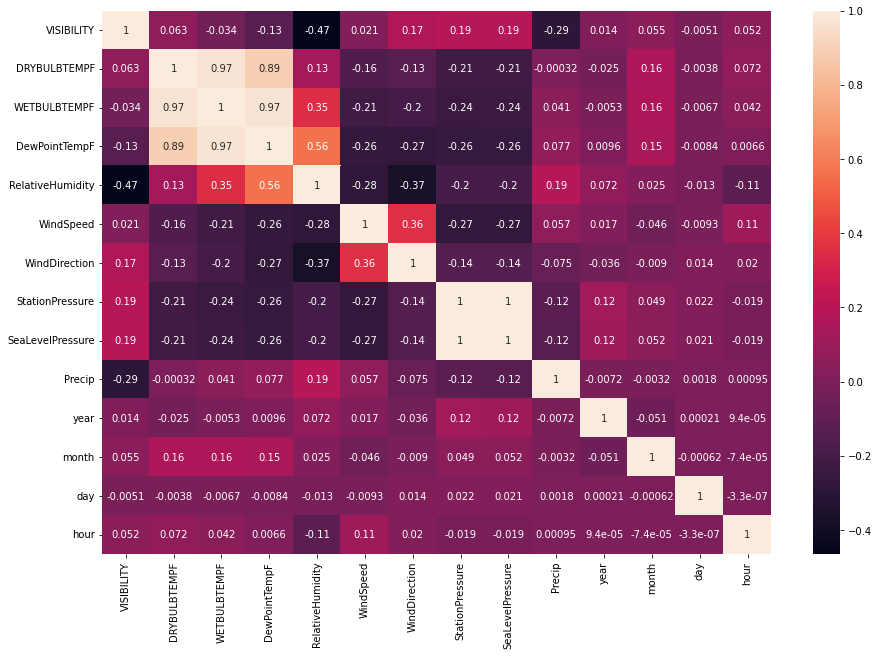

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

Observations
* **`DRYBULBTEMPF`**, **`WETBULBTEMPF`**, **`DewPointTempF`** are highly correlated, about 90 percent
* **`StationPressure`**, **`SeaLevelPressure`** are 100 percent correlated
